In [1]:
import os
os.environ["MY_NUMBA_TARGET"] = "numba"
os.environ["GAUGE_GROUP"] = 'su3'

import sys
sys.path.append('..')

from curraun.wong import init_charge_brute_force, init_charge_darboux, init_charge, init_charge_brute_force_s3s5, trial_init_charge
import curraun.su as su
import numpy as np

Using Numba
Using SU(3)
Using double precision


In [ ]:
def trial_init_charge():
    """
        Step 1: specific random color vector
    """

    V = unitary_group.rvs(3)
    detV = np.linalg.det(V)
    U = V / detV ** (1 / 3)
    # Ud = np.conj(U).T

    Q = U

    """
        Step 3: Project onto color components
    """

    q = 2 * np.einsum('ijk,kj', T, Q)
    return np.real(q)

def init_charge_brute_force_s3s5():

    q2 = 4/3
    # q2 = 1
    # q2 = 4

    R = np.sqrt(q2)
    theta = np.random.uniform(0, 2*np.pi)
    r3, r5 = R*np.cos(theta), R*np.sin(theta)
    #S^3
    phi3 = np.random.uniform(0, 2*np.pi, 2)
    Q1 = r3 * np.cos(phi3[0])
    Q2 = r3 * np.sin(phi3[0])*np.cos(phi3[1])
    Q3 = r3 * np.sin(phi3[0])*np.sin(phi3[1])

    #S^5
    phi5 = np.random.uniform(0, 2*np.pi, 4)
    Q4 = r5 * np.cos(phi5[0])
    Q5 = r5 * np.sin(phi5[0])*np.cos(phi5[1])
    Q6 = r5 * np.sin(phi5[0])*np.sin(phi5[1])*np.cos(phi5[2])
    Q7 = r5 * np.sin(phi5[0])*np.sin(phi5[1])*np.sin(phi5[2])*np.cos(phi5[3])
    Q8 = r5 * np.sin(phi5[0])*np.sin(phi5[1])*np.sin(phi5[2])*np.sin(phi5[3])

    q0 = np.array([Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8])

    return q0

In [2]:
ntrials = 10**6
c2s, c3s, q0s = [], [], []
for n in range(ntrials):
    q0 = trial_init_charge()
    q0s.append(q0)
    Q0 = su.get_algebra_element(q0)
    c2, c3 = su.casimir_fundamental_brute_force(Q0)
    # c2, c3 = su.casimir_fundamental(Q0)
    c2s.append(c2)
    c3s.append(c3)
q0s, c2s, c3s = np.array(q0s), np.array(c2s), np.array(c3s)

In [3]:
def deltadirac(eps,x):
    return np.exp(-x**2/(2*eps**2))/(np.sqrt(2*np.pi)*eps)

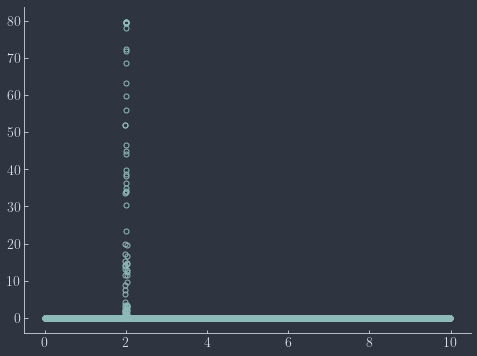

In [35]:
x = np.random.rand(10000)*10
wanted_x = 2
eps = 0.01
plt.plot(x, x*deltadirac(eps,x-wanted_x), linewidth=0, markersize=5, marker='o',mfc='none')

In [4]:
wanted_c2 = 4/3
wanted_c3 = 10/9

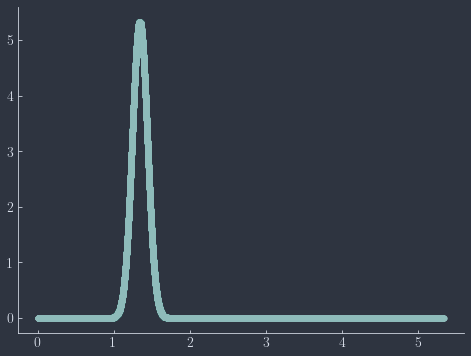

In [26]:
import matplotlib.pyplot as plt
plt.style.use('nord_theme.mpltstyle')
plt.rcParams["figure.figsize"] = (8, 6)
# plt.ylabel(r'$C_2$')
# plt.xlabel(r'$N_\mathrm{samples}$')
# plt.plot(c2s, linewidth=0, markersize=5, marker='o',mfc='none')
eps = 0.1
distrib_c2s = c2s*deltadirac(eps,c2s-wanted_c2*np.ones(len(c2s)))
# plt.plot(distrib_c2s, linewidth=0, markersize=5, marker='o',mfc='none')
# plt.plot(np.ones(len(c2s))*4/3)
plt.plot(c2s, distrib_c2s, linewidth=0, markersize=5, marker='o',mfc='none')

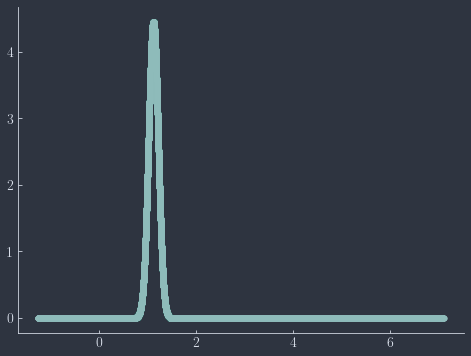

In [27]:
import matplotlib.pyplot as plt
plt.style.use('nord_theme.mpltstyle')
plt.rcParams["figure.figsize"] = (8, 6)
eps = 0.1
distrib_c3s = c3s*deltadirac(eps,c3s-wanted_c3*np.ones(len(c3s)))
plt.plot(c3s, distrib_c3s, linewidth=0, markersize=5, marker='o',mfc='none')

In [28]:
accuracy = 0.1
indices = []
for i in range(len(c2s)):
    if distrib_c2s[i]>accuracy:
        if distrib_c3s[i]>accuracy:
            indices.append(i)
# print(indices)
for i in indices:
    print('c2=', c2s[i])
    print('c3=', c3s[i])

c2= 1.5708099254379206
c3= 1.1288267667979963
c2= 1.450556412271231
c3= 0.9422653372228749
c2= 1.6109226933532672
c3= 1.0688800308708326
c2= 1.4419047141816344
c3= 0.9292059292794996
c2= 1.48734822243997
c3= 0.9559552268709586
c2= 1.5004288801581118
c3= 0.9861535456491257
c2= 1.501581963585637
c3= 1.0464603933080439
c2= 1.6154522305292174
c3= 1.1796300161151343
c2= 1.5762405176306107
c3= 1.0369233061706042
c2= 1.597194371059339
c3= 1.1183697338031005
c2= 1.4987224137203612
c3= 0.9447467242360307
c2= 1.5515612107538135
c3= 0.9650749978132238
c2= 1.399954965554612
c3= 0.8820365639766551
c2= 1.5692097229494135
c3= 1.133592417209265
c2= 1.3459192281082994
c3= 0.8834334176103207
c2= 1.5949914045135996
c3= 1.136603100999835
c2= 1.411705870950458
c3= 0.9005452052641709
c2= 1.5259916230582737
c3= 1.0344092944274168
c2= 1.470593098394602
c3= 1.0032581014503017
c2= 1.6091602555380928
c3= 1.1477836414264995
c2= 1.599277881298169
c3= 1.166893754222591
c2= 1.5349747935037634
c3= 1.0842503917303963


In [10]:
accuracy = 1
k = distrib_c2s[distrib_c3s>accuracy]
l = k[k>accuracy]
print(l)
print(np.max(l))
l_difference = np.abs(l - 4/3)
index = l.argmin()
print('c2=', l[index])
print('c3=', l[index])

[1.81232776 1.48193914 1.45467961 ... 1.34339508 2.68199009 3.79314957]
4.659343716671598
c2= 1.0002219907124072
c3= 1.0002219907124072


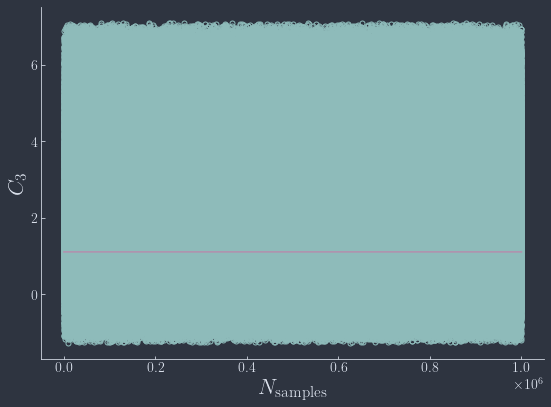

In [8]:
import matplotlib.pyplot as plt
plt.style.use('nord_theme.mpltstyle')
plt.rcParams["figure.figsize"] = (8, 6)
plt.ylabel(r'$C_3$')
plt.xlabel(r'$N_\mathrm{samples}$')
plt.plot(c3s, linewidth=0, markersize=5, marker='o',mfc='none')
plt.plot(np.ones(len(c3s))*10/9)
plt.tight_layout()
# plt.ylim(1,2)
# plt.savefig('brute_force_color_charges_modified_casimirs.png', dpi=300, transparent=False)

In [9]:
wanted_c2 = 4/3 
# wanted_c3 = 10/3
c2_difference = np.abs(c2s - wanted_c2)
index = c2_difference.argmin()
print('c2=', c2s[index])
print('c3=', c3s[index])

c2= 1.3333325104492748
c3= 0.2785004128273879


In [10]:
# wanted_c2 = 4/3 
wanted_c3 = 10/3
c3_difference = np.abs(c3s - wanted_c3)
index = c3_difference.argmin()
print('c2=', c2s[index])
print('c3=', c3s[index])

c2= 3.506683467719732
c3= 3.3333303248132093


In [2]:
ntrials = 10**6
c3s, q0s = [], []
for n in range(ntrials):
    q0 = init_charge_brute_force()
    q0s.append(q0)
    Q0 = su.get_algebra_element(q0)
    c2, c3 = su.casimir_fundamental_brute_force(Q0)
    # c2, c3 = su.casimir_fundamental(Q0)
    c3s.append(c3)
q0s, c3s = np.array(q0s), np.array(c3s)

In [4]:
wanted_c3 = 10/9 
# wanted_c3 = 10/3
c3_difference = np.abs(c3s - wanted_c3)
index = c3_difference.argmin()
print('c3=', c3s[index])
print('q0=', q0s[index])

c3= 1.1111080124637323
q0= [ 1.47671668  0.50269614 -0.19264837  0.0303026   0.15336318 -0.65234829
  0.17817969  1.02359477]


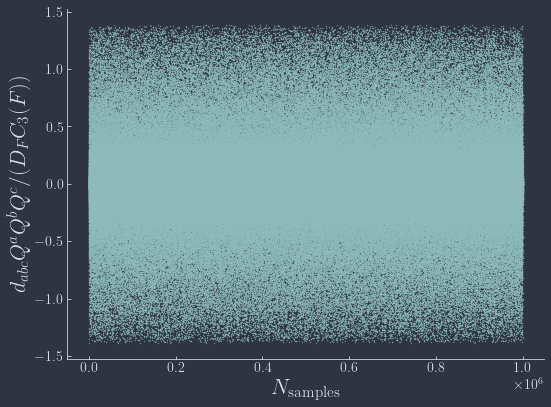

In [6]:
import matplotlib.pyplot as plt
plt.style.use('nord_theme.mpltstyle')
plt.rcParams["figure.figsize"] = (8, 6)
plt.ylabel(r'$d_{abc}Q^aQ^bQ^c/(D_FC_3(F))$')
plt.xlabel(r'$N_\mathrm{samples}$')
plt.plot(np.divide(c3s, wanted_c3), linewidth=0, markersize=0.3, marker='o',mfc='none')
plt.tight_layout()
plt.savefig('brute_force_color_charges_modified_casimirs.png', dpi=300, transparent=False)

In [2]:
ntrials = 1
c3s, q0s = [], []
for n in range(ntrials):
    q0 = init_charge_darboux()
    q0s.append(q0)
    Q0 = su.get_algebra_element(q0)
    c2, c3 = su.casimir_fundamental_brute_force(Q0)
    # c2, c3 = su.casimir_fundamental(Q0)
    c3s.append(c3)
q0s, c3s = np.array(q0s), np.array(c3s)

UnboundLocalError: local variable 'y' referenced before assignment

In [3]:
print(q0)

[        nan         nan -5.71967784         nan         nan         nan
         nan  0.27549019]


In [3]:
def su3_euler_angles():
    a1, a3, a5, a7 = np.random.uniform(0, np.pi), np.random.uniform(0, np.pi), np.random.uniform(0, np.pi), np.random.uniform(0, np.pi)
    a2, a4, a6 = np.random.uniform(0, np.pi/2), np.random.uniform(0, np.pi/2), np.random.uniform(0, np.pi/2)
    a8 = np.random.uniform(0, 2*np.pi)
    # a1, a2, a3, a4, a5, a6, a7, a8 = np.pi, np.pi/2, np.pi, np.pi/2, np.pi, np.pi/2, np.pi, 2*np.pi

    # u11 = (np.cos(a1+a7+a8/np.sqrt(3))+1j*np.sin(a1+a7+a8/np.sqrt(3)))*((np.cos(a3+a5)+1j*np.sin(a3+a5))*np.cos(a2)*np.cos(a4)*np.cos(a6)-(np.cos(a3+a5)-1j*np.sin(a3+a5))*np.sin(a2)*np.sin(a6))
    # u12 =(np.cos(a1-a7+a8/np.sqrt(3))+1j*np.sin(a1-a7+a8/np.sqrt(3)))*(np.exp(1j*(a3+a5))*np.cos(a2)*np.cos(a4)*np.sin(a6)+(np.cos(a3+a5)-1j*np.sin(a3+a5))*np.sin(a2)*np.cos(a6))
    # u13 = (np.cos(a1+a3-2*a8/np.sqrt(3))+1j*np.sin(a1+a3-2*a8/np.sqrt(3)))*np.cos(a2)*np.sin(a4)
    # u21 = (np.cos(-a1+a7+a8/np.sqrt(3))+1j*np.sin(-a1+a7+a8/np.sqrt(3)))*(-np.exp(1j*(a3+a5))*np.sin(a2)*np.cos(a4)*np.cos(a6)-(np.cos(a3+a5)-1j*np.sin(a3+a5))*np.cos(a2)*np.sin(a6))
    # u22 = (np.cos(-a1-a7+a8/np.sqrt(3))+1j*np.sin(-a1-a7+a8/np.sqrt(3)))*(-np.exp(1j*(a3+a5))*np.sin(a2)*np.cos(a4)*np.sin(a6)+(np.cos(a3+a5)-1j*np.sin(a3+a5))*np.cos(a2)*np.cos(a6))
    # u23 = - (np.cos(-a1+a3-2*a8/np.sqrt(3))+1j*np.sin(-a1+a3-2*a8/np.sqrt(3)))*np.sin(a2)*np.sin(a4)
    # u31 = - (np.cos(a5+a7+a8/np.sqrt(3))+1j*np.sin(a5+a7+a8/np.sqrt(3)))*np.sin(a4)*np.cos(a6)
    # u32 = -(np.cos(a5-a7+a8/np.sqrt(3))+1j*np.sin(a5-a7+a8/np.sqrt(3)))*np.sin(a4)*np.sin(a6)
    # u33 = np.exp(-2*a8/np.sqrt(3))*np.cos(a4)

    # u = np.array([u11, u12, u13, u21, u22, u23, u31, u32, u33])

    u = su.euler(-a1/2, -a2/2, -a3/2, -a4/2, -a5/2, -a6/2, -a7/2, -a8/2)
    a = [a1, a2, a3, a4, a5, a6, a7, a8]

    return u, a

ntrials = 10**6
c2s, c3s, us, angles, qs = [], [], [], [], []
for n in range(ntrials):
    u, a = su3_euler_angles()
    q = su.get_color_components(u)
    accuracy = 0.01
    condition = True
    for i in range(len(q)):
        if np.abs(np.imag(q[i]))>accuracy:
            condition = False
    if condition==True:
        # print(q)
        us.append(u)
        angles.append(a)
        qs.append(q)
        c2, c3 = su.casimir_euler_angles(u)
        c2s.append(c2)
        c3s.append(c3)

    # # u = su.u()
    # c2, c3 = su.casimir_euler_angles(u)
    # if (np.abs(np.imag(c2))<0.01):
    #     if (np.real(c2)>0) and (np.real(c3)>0):
    #         us.append(u)
    #         angles.append(a)
    #         # print('c2=',c2)
    #         # c2, c3 = su.casimir_fundamental(Q0)
    #         c2s.append(c2)
    #         c3s.append(c3)
c2s, c3s, us = np.array(c2s), np.array(c3s), np.array(us)

In [7]:
# print(c2s)
# print(c3s)
# print(qs)

index = 1
print(c2s[index])
print(c3s[index])
print(qs[index])
print(angles[index])

2.991797839120819
-1.0053876571593452
((0.6503601260868642+0.0082078430710249j), (0.6622421208318552+0.008319838771909227j), (0.36956671382662987+0.004730039519085558j), (-0.009231508759530454+0.0010219443637042563j), (0.012899520401746523-0.0041023199181063705j), (0.001979640080279429+0.0033389161329853705j), (0.010807943221191527+0.005758019354040878j), (0.576712872716261+0.007872388829733182j))
[1.6461574506555994, 1.0841551397353917, 3.1311384923824965, 0.04169357221351493, 2.5528412824588944, 1.5576644315391064, 3.0495784613700576, 5.397674080555781]


In [12]:
U = np.reshape(us[1], (3,3))
print(np.linalg.det(U))
print(np.multiply(U, np.transpose(np.conjugate(U))))
print(np.trace(np.multiply(U,U)))
print(np.trace(np.multiply(np.multiply(U,U),U)))

(1.0000000000000004+5.551115123125785e-17j)
[[ 9.98984575e-01+0.00000000e+00j  1.62082956e-04+6.05337208e-04j
  -1.50741590e-04-3.58345792e-04j]
 [ 1.62082956e-04-6.05337208e-04j  9.99262723e-01+0.00000000e+00j
  -1.01791739e-04-4.32687898e-05j]
 [-1.50741590e-04+3.58345792e-04j -1.01791739e-04+4.32687898e-05j
   9.99500622e-01+0.00000000e+00j]]
(-1.49885190259433-2.596109971215071j)
(2.9965668212576415+1.760346785034672e-05j)


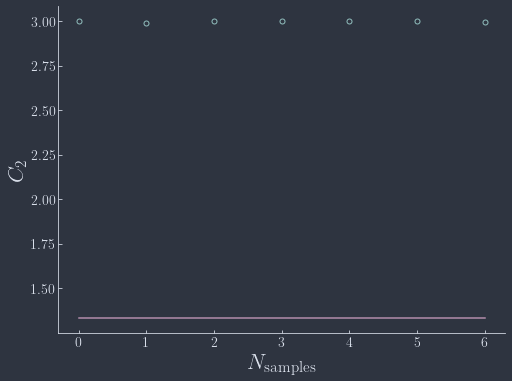

In [4]:
import matplotlib.pyplot as plt
plt.style.use('nord_theme.mpltstyle')
plt.rcParams["figure.figsize"] = (8, 6)
plt.ylabel(r'$C_2$')
plt.xlabel(r'$N_\mathrm{samples}$')
plt.plot(c2s, linewidth=0, markersize=5, marker='o',mfc='none')
plt.plot(np.ones(len(c2s))*4/3)
# plt.ylim(1,2)
# plt.tight_layout()
# plt.savefig('brute_force_color_charges_modified_casimirs.png', dpi=300, transparent=False)

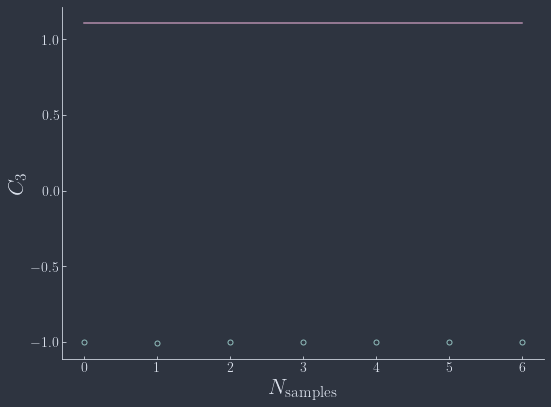

In [5]:
import matplotlib.pyplot as plt
plt.style.use('nord_theme.mpltstyle')
plt.rcParams["figure.figsize"] = (8, 6)
plt.ylabel(r'$C_3$')
plt.xlabel(r'$N_\mathrm{samples}$')
plt.plot(c3s, linewidth=0, markersize=5, marker='o',mfc='none')
plt.plot(np.ones(len(c3s))*10/9)
plt.tight_layout()
# plt.ylim(1,2)
# plt.savefig('brute_force_color_charges_modified_casimirs.png', dpi=300, transparent=False)

In [58]:
wanted_c2 = 4/3 
# wanted_c3 = 10/3
c2_difference = np.abs(c2s - wanted_c2)
index = c2_difference.argmin()
print('c2=', c2s[index])
print('c3=', c3s[index])
print('u=', us[index])
print('angles=', angles[index])

c2= (1.3283957350403024-0.0014762950419719423j)
c3= 10.892938548137849
u= [-0.36116321+0.39803045j  0.19528688-0.76383319j -0.28117701+0.10244162j
  0.10851739-0.23416954j -0.31674584-0.29093158j -0.20660093-0.84008068j
 -0.8008931 +0.05560341j -0.41551823+0.14421299j  0.38787102-0.10761872j]
angles= [0.7312779373318121, 1.237763564081824, 2.3315818402683846, 1.156523716834022, 2.804578847608444, 0.5011979517088778, 0.13237234360797967, 5.675789486692198]


In [60]:
# wanted_c2 = 4/3 
wanted_c3 = 10/3
c3_difference = np.abs(c3s - wanted_c3)
index = c3_difference.argmin()
print('c2=', c2s[index])
print('c3=', c3s[index])
print('u=', us[index])
print('angles=', angles[index])

c2= (4.18856965924707+0.0023211002312926166j)
c3= 3.336531883890588
u= [-0.50733161-0.29590248j  0.58427659+0.12807498j  0.23887674+0.49011421j
  0.78765294+0.17464989j  0.38516564-0.01232847j  0.32803275+0.30494296j
  0.05455683-0.03435365j  0.17874158-0.6795326j  -0.63689362+0.31063932j]
angles= [1.754972021519149, 0.6876853921717085, 2.9577008308837995, 0.7832678851122078, 0.40612586682666935, 1.4792968715306167, 0.3758124202428009, 3.1136950056118393]


In [71]:
wanted_c2, wanted_c3 = 4/3, 10/9 

delta = 1.38
for i in range(len(us)):
    if (np.abs(c2s[i]-wanted_c2)<delta) and (np.abs(c3s[i]-wanted_c3)<delta):
        print(i)
        print('c2=', c2s[i])
        print('c3=', c3s[i])
        print('u=', us[i])

1779
c2= (2.7110717526672405+0.003544958315082336j)
c3= 0.043566641833582054
u= [ 0.8073095 +0.15361846j -0.31435779-0.02914886j -0.01543204+0.47407184j
  0.32553702-0.15720782j  0.87037654-0.30926438j -0.1162684 +0.05092387j
 -0.0951476 +0.43001281j  0.17119153-0.13350362j  0.85708949+0.15589664j]
6308
c2= (2.7105119323312605+0.008120053236289587j)
c3= 0.04207351727749287
u= [ 0.88279827-0.24916591j -0.11707752+0.16606552j  0.15766299+0.30404118j
  0.04193818+0.00937881j  0.83287873+0.31013876j -0.38886215+0.2388858j
 -0.03116287+0.39467159j  0.28752519+0.29354954j  0.81900743-0.06039853j]
8111
c2= (2.7104818364788446+0.00619293146080227j)
c3= 0.04199890755607072
u= [ 0.81165773+0.45335822j  0.32557835+0.0933474j   0.01103281+0.14436526j
 -0.34735674+0.03044931j  0.79270788-0.37712385j -0.07665776+0.3192672j
 -0.11795025+0.01348806j  0.19873413+0.27419257j  0.93031387-0.07579637j]
9021
c2= (2.70779387369714+0.007841709799055296j)
c3= 0.034876085395807
u= [ 0.9517707 +0.09241165j -0.10

In [2]:
ntrials = 10**5
q0s = []
for n in range(ntrials):
    q0 = init_charge('fundamental')
    q0s.append(q0)
    # Q0 = su.get_algebra_element(q0)
    # c2, c3 = su.casimir_fundamental_brute_force(Q0)
    # c2, c3 = su.casimir_fundamental(Q0)
    # c3s.append(c3)
# q0s, c3s = np.array(q0s), np.array(c3s)
q0s = np.array(q0s)

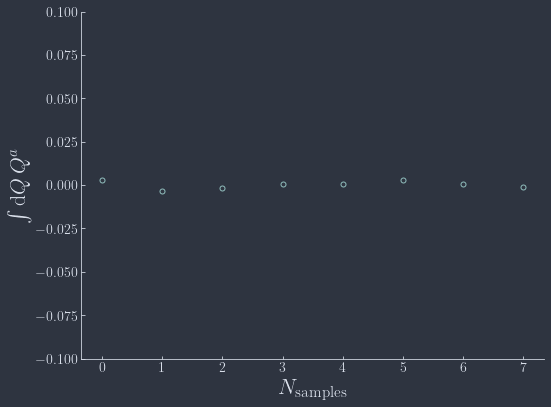

In [11]:
import matplotlib.pyplot as plt
plt.style.use('nord_theme.mpltstyle')
plt.rcParams["figure.figsize"] = (8, 6)
plt.ylabel(r'$\int\mathrm{d}Q\,Q^a$')
plt.xlabel(r'$N_\mathrm{samples}$')
plt.plot(np.mean(q0s,axis=0), linewidth=0, markersize=5, marker='o',mfc='none')
plt.ylim(-0.1,0.1)
# plt.plot(q0s, linewidth=0, markersize=0.3, marker='o',mfc='none')
plt.tight_layout()

In [5]:
ntrials = 10**6
c3s, q0s = [], []
for n in range(ntrials):
    q0 = init_charge_brute_force_s3s5()
    q0s.append(q0)
    Q0 = su.get_algebra_element(q0)
    c2, c3 = su.casimir_fundamental_brute_force(Q0)
    # c2, c3 = su.casimir_fundamental(Q0)
    c3s.append(c3)
q0s, c3s = np.array(q0s), np.array(c3s)

In [6]:
wanted_c3 = 10/9 
# wanted_c3 = 10/3
c3_difference = np.abs(c3s - wanted_c3)
index = c3_difference.argmin()
print('c3=', c3s[index])
print('q0=', q0s[index])

c3= 0.8884763325625782
q0= [ 0.84311843  0.09847745 -0.00569183  0.39170282  0.33203291  0.42602297
  0.28230478  0.29645562]


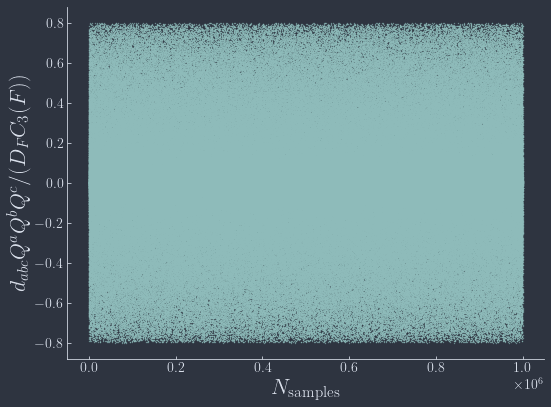

In [7]:
import matplotlib.pyplot as plt
plt.style.use('nord_theme.mpltstyle')
plt.rcParams["figure.figsize"] = (8, 6)
plt.ylabel(r'$d_{abc}Q^aQ^bQ^c/(D_FC_3(F))$')
plt.xlabel(r'$N_\mathrm{samples}$')
plt.plot(np.divide(c3s, wanted_c3), linewidth=0, markersize=0.3, marker='o',mfc='none')
plt.tight_layout()
# plt.savefig('brute_force_color_charges_modified_casimirs.png', dpi=300, transparent=False)